<style>body{font-family:Inter,Segoe UI,Roboto,sans-serif;background:#0f172a;color:#e5e7eb}.rendered_html{font-size:16px;line-height:1.7;color:#e5e7eb}.rendered_html h1{font-size:2.4em;font-weight:700;color:#38bdf8;border-bottom:2px solid #1e293b;padding-bottom:.3em}.rendered_html h2{font-size:1.9em;color:#7dd3fc;margin-top:1.4em}.rendered_html h3{font-size:1.4em;color:#bae6fd}.rendered_html a{color:#22d3ee;text-decoration:none}.rendered_html a:hover{text-decoration:underline}.rendered_html blockquote{border-left:4px solid #38bdf8;background:#020617;padding:.6em 1em;color:#cbd5f5;font-style:italic}.rendered_html pre,.output_area pre{background:#020617;border-radius:10px;padding:1em;border:1px solid #1e293b;color:#e5e7eb}.rendered_html code{background:#020617;padding:.2em .4em;border-radius:6px;color:#7dd3fc;font-size:.95em}.rendered_html table{border-collapse:collapse;width:100%;margin:1em 0}.rendered_html th{background:#020617;color:#38bdf8;padding:.6em;border-bottom:2px solid #1e293b}.rendered_html td{padding:.6em;border-bottom:1px solid #1e293b}.rendered_html tr:hover{background:#020617}::-webkit-scrollbar{width:8px}::-webkit-scrollbar-thumb{background:#1e293b;border-radius:8px}::-webkit-scrollbar-track{background:#020617}</style>


<div style='color:white; background-color:#6b9bc3ff; border-color: #6b9bc3ff; '>
    <h2>KIE4004 Assignement</h2>

<div style='color: #6b9bc3ff'>
    <h1>Group members</h1>
</div>

-  Charlilou MAES 24218769

-  Louise CLivio

-  Madeleine 

-   

-   

<div style='color: #6b9bc3ff'>
    <h2>Task 1</h2>
</div>

<div style='color: #6b9bc3ff'>
    <h3>Construct the IEEE system</h3>
</div>

IEEE 33-Bus System Code

IEEE 33-Bus Radial Distribution System
Base MVA: 100.0 MVA
Base Voltage: 12.66 kV
Number of Buses: 33
Number of Branches: 32
Total Load: 3.715 MW + j2.300 MVAr

BUS DATA
 Bus  Type V (p.u.) Angle (deg) P_Load (MW) Q_Load (MVAr)
   1 Slack   1.0000        0.00      0.0000        0.0000
   2    PQ   1.0000        0.00      0.1000        0.0600
   3    PQ   1.0000        0.00      0.0900        0.0400
   4    PQ   1.0000        0.00      0.1200        0.0800
   5    PQ   1.0000        0.00      0.0600        0.0300
   6    PQ   1.0000        0.00      0.0600        0.0200
   7    PQ   1.0000        0.00      0.2000        0.1000
   8    PQ   1.0000        0.00      0.2000        0.1000
   9    PQ   1.0000        0.00      0.0600        0.0200
  10    PQ   1.0000        0.00      0.0600        0.0200
  11    PQ   1.0000        0.00      0.0450        0.0300
  12    PQ   1.0000        0.00      0.0600        0.0350
  13    PQ   1.0000        0.00      0.0600        0.0350
  14    PQ   1.000

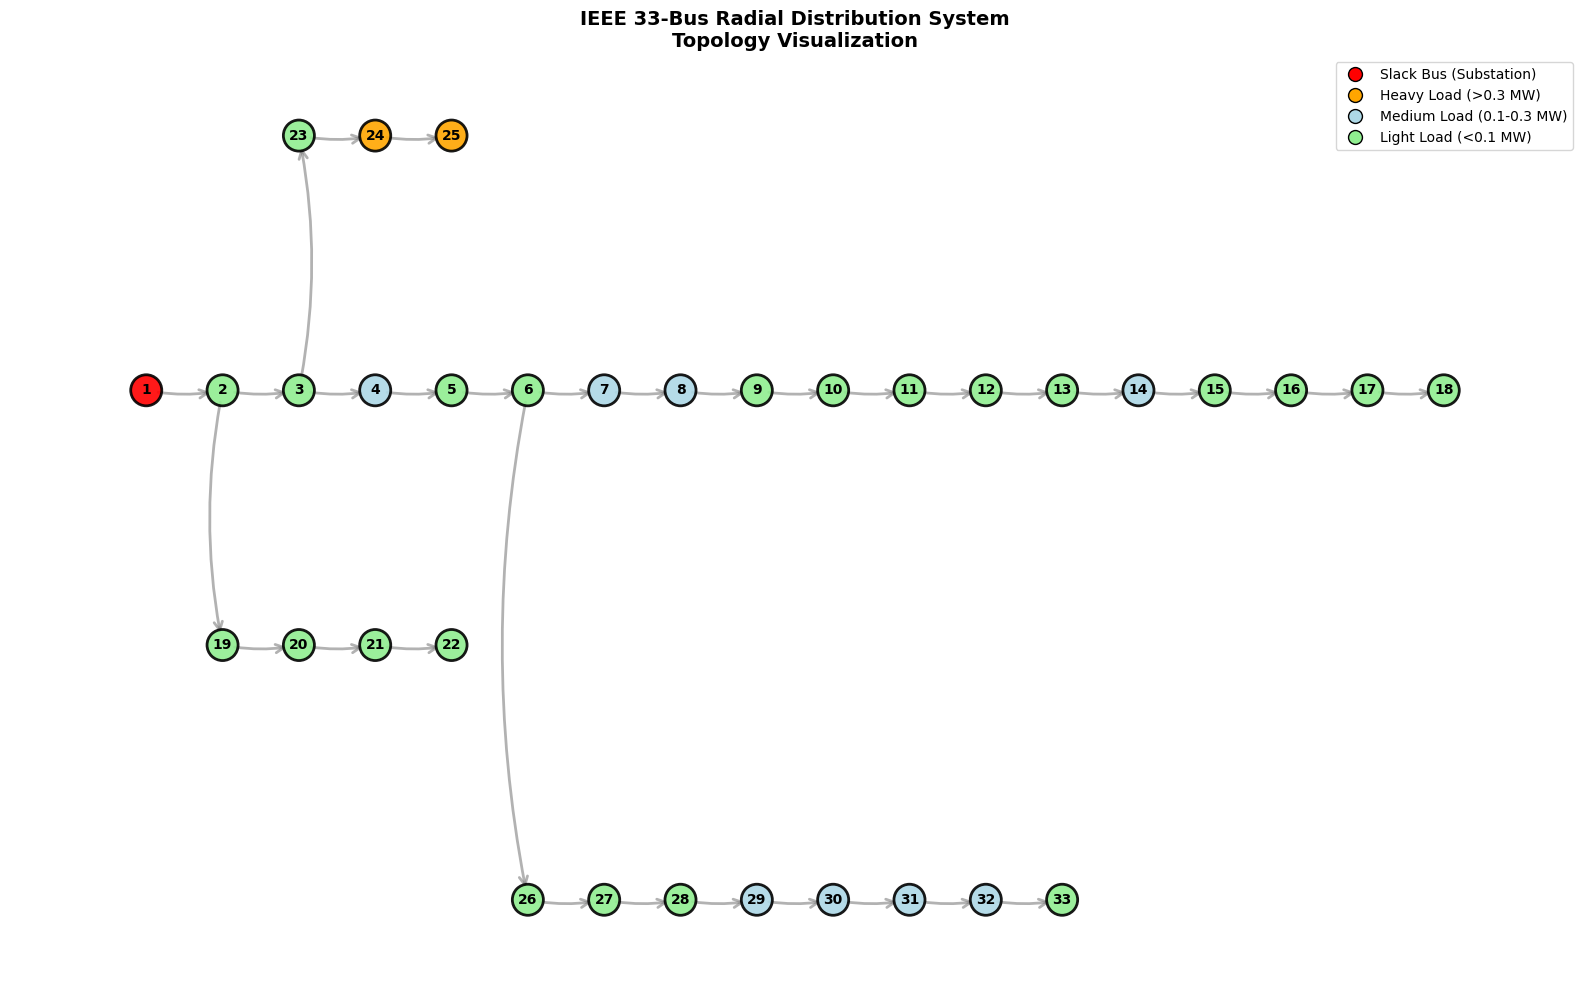

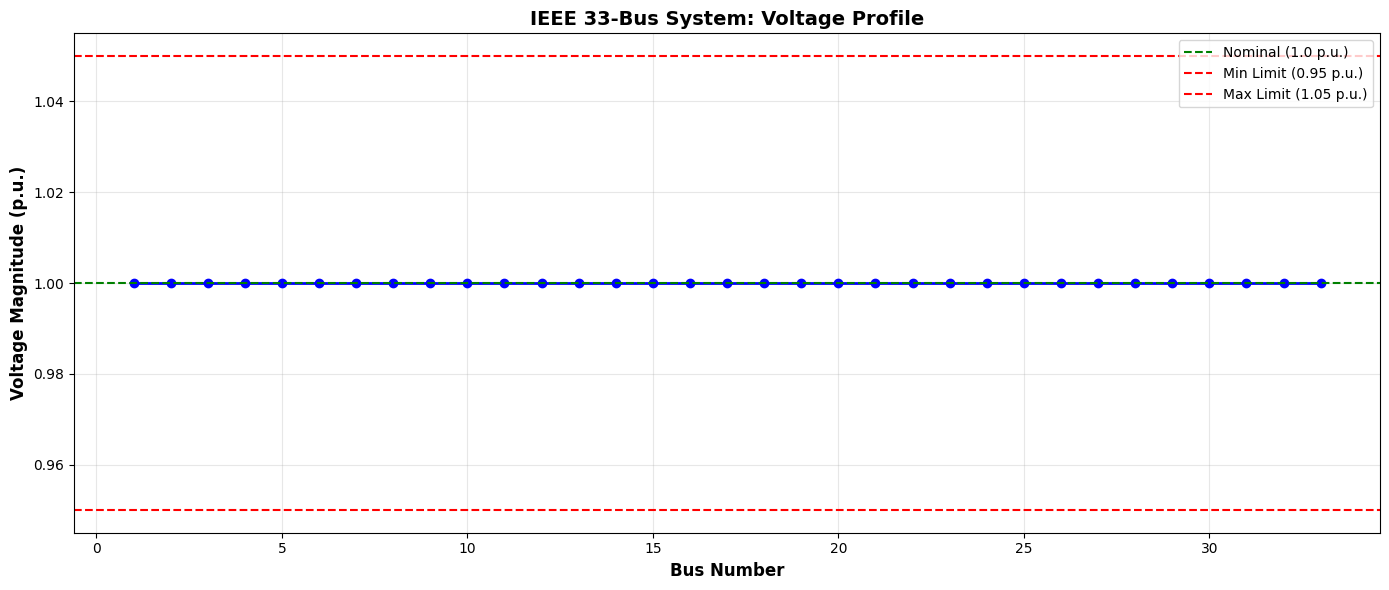

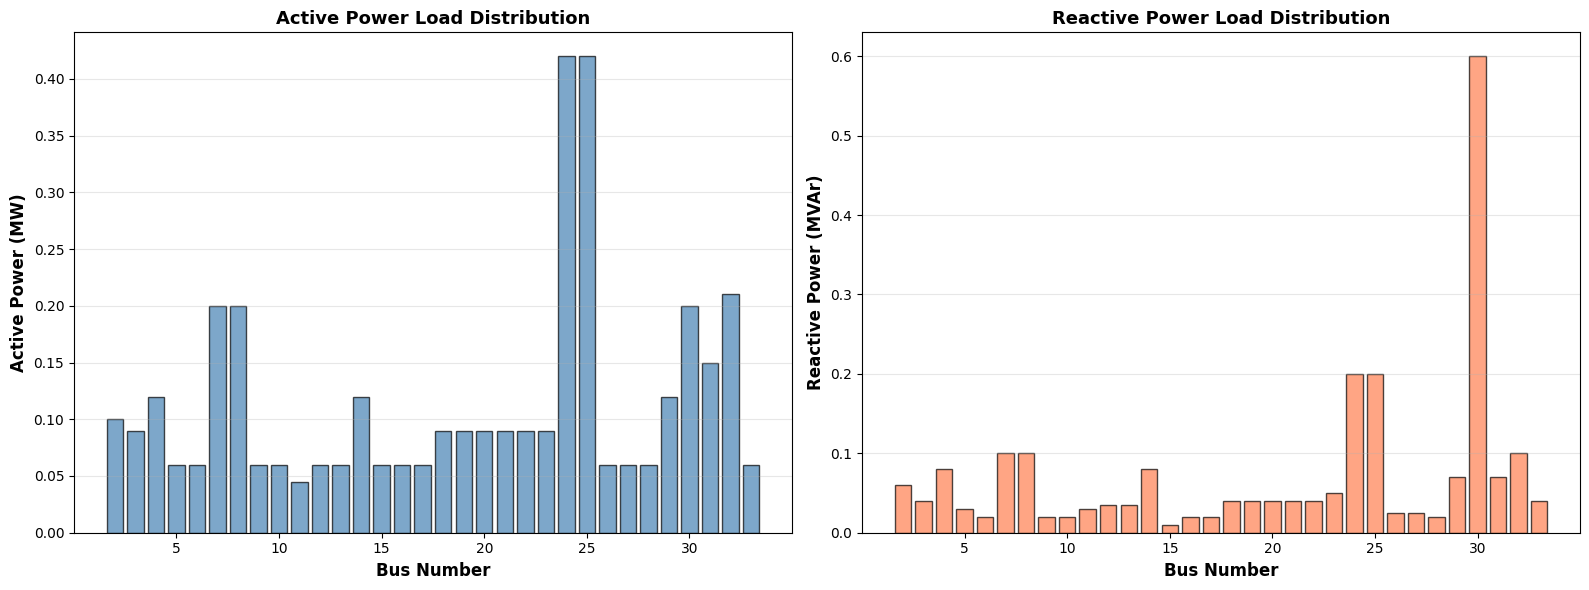

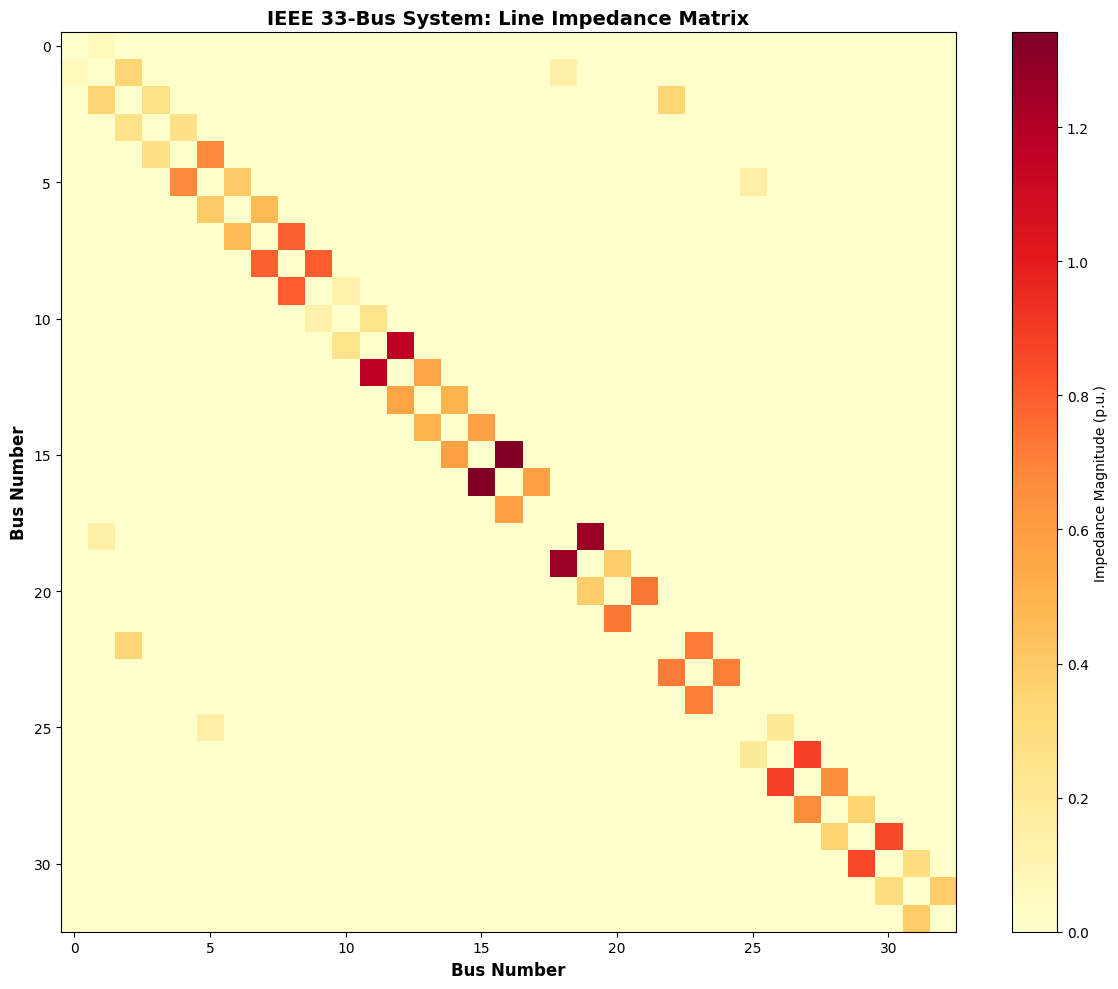

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass
from typing import List

@dataclass
class Bus:
    """
    Represents a bus in the power system
    
    Attributes:
        number: Bus identification number
        bus_type: 1=Slack/Swing, 2=PV/Generator, 3=PQ/Load
        voltage: Voltage magnitude in per unit (p.u.)
        angle: Voltage angle in radians
        p_load: Active power load in MW
        q_load: Reactive power load in MVAr
    """
    number: int
    bus_type: int
    voltage: float = 1.0
    angle: float = 0.0
    p_load: float = 0.0
    q_load: float = 0.0

@dataclass
class Branch:
    """
    Represents a branch (transmission line) in the power system
    
    Attributes:
        from_bus: Starting bus number
        to_bus: Ending bus number
        resistance: Line resistance in per unit (p.u.)
        reactance: Line reactance in per unit (p.u.)
        susceptance: Line charging susceptance in p.u.
    """
    from_bus: int
    to_bus: int
    resistance: float
    reactance: float
    susceptance: float = 0.0

class IEEE33BusSystem:
    """
    IEEE 33-Bus Radial Distribution System
    
    This is a standard test system used for distribution network studies.
    Base Values:
        - Base MVA: 100 MVA
        - Base Voltage: 12.66 kV
        - Total Load: 3.715 MW + j2.300 MVAr
    """
    
    def __init__(self):
        self.name = "IEEE 33-Bus Radial Distribution System"
        self.base_mva = 100.0  # Base power in MVA
        self.base_kv = 12.66   # Base voltage in kV
        self.buses: List[Bus] = []
        self.branches: List[Branch] = []
        self._build_system()
    
    def _build_system(self):
        """Construct the complete IEEE 33-bus system"""
        self._create_buses()
        self._create_branches()
    
    def _create_buses(self):
        """
        Create all 33 buses with their load data
        
        Load data format: [Bus Number, P_load (kW), Q_load (kVAr)]
        Bus 1 is the slack bus (substation) with no load
        """
        # Bus load data from IEEE 33-bus standard test system
        bus_loads = [
            [1, 0, 0],       # Slack bus (substation)
            [2, 100, 60],
            [3, 90, 40],
            [4, 120, 80],
            [5, 60, 30],
            [6, 60, 20],
            [7, 200, 100],
            [8, 200, 100],
            [9, 60, 20],
            [10, 60, 20],
            [11, 45, 30],
            [12, 60, 35],
            [13, 60, 35],
            [14, 120, 80],
            [15, 60, 10],
            [16, 60, 20],
            [17, 60, 20],
            [18, 90, 40],
            [19, 90, 40],
            [20, 90, 40],
            [21, 90, 40],
            [22, 90, 40],
            [23, 90, 50],
            [24, 420, 200],
            [25, 420, 200],
            [26, 60, 25],
            [27, 60, 25],
            [28, 60, 20],
            [29, 120, 70],
            [30, 200, 600],
            [31, 150, 70],
            [32, 210, 100],
            [33, 60, 40]
        ]
        
        # Create bus objects
        for bus_num, p_kw, q_kvar in bus_loads:
            bus_type = 1 if bus_num == 1 else 3  # 1=Slack, 3=PQ
            self.buses.append(Bus(
                number=bus_num,
                bus_type=bus_type,
                voltage=1.0,  # Initial voltage estimate
                angle=0.0,    # Initial angle estimate
                p_load=p_kw / 1000.0,    # Convert kW to MW
                q_load=q_kvar / 1000.0   # Convert kVAr to MVAr
            ))
    
    def _create_branches(self):
        """
        Create all branches (lines) with their impedance data
        
        Branch data format: [From Bus, To Bus, R (Ω), X (Ω)]
        Impedances are converted to per unit using base values
        """
        # Calculate base impedance: Z_base = (V_base)^2 / S_base
        base_z = (self.base_kv ** 2) / self.base_mva  # in Ohms
        
        # Line data from IEEE 33-bus standard test system
        line_data = [
            [1, 2, 0.0922, 0.0477],
            [2, 3, 0.4930, 0.2511],
            [3, 4, 0.3660, 0.1864],
            [4, 5, 0.3811, 0.1941],
            [5, 6, 0.8190, 0.7070],
            [6, 7, 0.1872, 0.6188],
            [7, 8, 0.7114, 0.2351],
            [8, 9, 1.0300, 0.7400],
            [9, 10, 1.0440, 0.7400],
            [10, 11, 0.1966, 0.0650],
            [11, 12, 0.3744, 0.1238],
            [12, 13, 1.4680, 1.1550],
            [13, 14, 0.5416, 0.7129],
            [14, 15, 0.5910, 0.5260],
            [15, 16, 0.7463, 0.5450],
            [16, 17, 1.2890, 1.7210],
            [17, 18, 0.7320, 0.5740],
            [2, 19, 0.1640, 0.1565],
            [19, 20, 1.5042, 1.3554],
            [20, 21, 0.4095, 0.4784],
            [21, 22, 0.7089, 0.9373],
            [3, 23, 0.4512, 0.3083],
            [23, 24, 0.8980, 0.7091],
            [24, 25, 0.8960, 0.7011],
            [6, 26, 0.2030, 0.1034],
            [26, 27, 0.2842, 0.1447],
            [27, 28, 1.0590, 0.9337],
            [28, 29, 0.8042, 0.7006],
            [29, 30, 0.5075, 0.2585],
            [30, 31, 0.9744, 0.9630],
            [31, 32, 0.3105, 0.3619],
            [32, 33, 0.3410, 0.5302]
        ]
        
        # Create branch objects with per unit impedances
        for from_bus, to_bus, r_ohm, x_ohm in line_data:
            self.branches.append(Branch(
                from_bus=from_bus,
                to_bus=to_bus,
                resistance=r_ohm / base_z,  # Convert to p.u.
                reactance=x_ohm / base_z,   # Convert to p.u.
                susceptance=0.0  # Negligible for distribution systems
            ))
    
    def get_bus_data(self) -> pd.DataFrame:
        """
        Return bus data as a pandas DataFrame
        
        Returns:
            DataFrame with bus information including voltages and loads
        """
        bus_data = []
        for bus in self.buses:
            bus_data.append({
                'Bus': bus.number,
                'Type': 'Slack' if bus.bus_type == 1 else 'PQ',
                'V (p.u.)': f"{bus.voltage:.4f}",
                'Angle (deg)': f"{np.degrees(bus.angle):.2f}",
                'P_Load (MW)': f"{bus.p_load:.4f}",
                'Q_Load (MVAr)': f"{bus.q_load:.4f}"
            })
        return pd.DataFrame(bus_data)
    
    def get_branch_data(self) -> pd.DataFrame:
        """
        Return branch data as a pandas DataFrame
        
        Returns:
            DataFrame with line information including impedances
        """
        branch_data = []
        for branch in self.branches:
            branch_data.append({
                'From Bus': branch.from_bus,
                'To Bus': branch.to_bus,
                'R (p.u.)': f"{branch.resistance:.6f}",
                'X (p.u.)': f"{branch.reactance:.6f}",
                'Z (p.u.)': f"{np.sqrt(branch.resistance**2 + branch.reactance**2):.6f}"
            })
        return pd.DataFrame(branch_data)
    
    def get_ybus_matrix(self) -> np.ndarray:
        """
        Calculate the bus admittance matrix (Y-bus)
        
        The Y-bus matrix is fundamental for power flow analysis
        Y[i,j] represents the admittance between bus i and bus j
        
        Returns:
            Complex numpy array representing the Y-bus matrix
        """
        n_buses = len(self.buses)
        Y = np.zeros((n_buses, n_buses), dtype=complex)
        
        # Build Y-bus from branch data
        for branch in self.branches:
            i = branch.from_bus - 1  # Convert to 0-based indexing
            j = branch.to_bus - 1
            
            # Calculate branch admittance
            z = branch.resistance + 1j * branch.reactance
            y = 1.0 / z if abs(z) > 1e-10 else 0.0
            
            # Fill Y-bus matrix
            # Off-diagonal elements (mutual admittance)
            Y[i, j] -= y
            Y[j, i] -= y
            
            # Diagonal elements (self admittance)
            Y[i, i] += y
            Y[j, j] += y
        
        return Y
    
    def print_system_info(self):
        """Print comprehensive system information"""
        print("="*70)
        print(f"{self.name}")
        print("="*70)
        print(f"Base MVA: {self.base_mva} MVA")
        print(f"Base Voltage: {self.base_kv} kV")
        print(f"Number of Buses: {len(self.buses)}")
        print(f"Number of Branches: {len(self.branches)}")
        
        # Calculate total load
        total_p = sum(bus.p_load for bus in self.buses)
        total_q = sum(bus.q_load for bus in self.buses)
        print(f"Total Load: {total_p:.3f} MW + j{total_q:.3f} MVAr")
        print("="*70)
    
    def plot_topology(self, figsize=(16, 10), show_bus_labels=True, 
                      show_loads=False, node_size=500):
        """
        Visualize the system topology using NetworkX
        
        Args:
            figsize: Figure size (width, height)
            show_bus_labels: Whether to show bus numbers
            show_loads: Whether to display load values on buses
            node_size: Size of bus nodes
        """
        # Create directed graph
        G = nx.DiGraph()
        
        # Add nodes (buses)
        for bus in self.buses:
            G.add_node(bus.number)
        
        # Add edges (branches)
        for branch in self.branches:
            G.add_edge(branch.from_bus, branch.to_bus)
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Use hierarchical layout for radial system
        pos = nx.spring_layout(G, k=2, iterations=50, seed=42)
        
        # Alternatively, use custom layout for better visualization
        pos = self._custom_layout()
        
        # Color nodes based on type and load
        node_colors = []
        for bus in self.buses:
            if bus.bus_type == 1:  # Slack bus
                node_colors.append('red')
            elif bus.p_load > 0.3:  # Heavy load
                node_colors.append('orange')
            elif bus.p_load > 0.1:  # Medium load
                node_colors.append('lightblue')
            else:  # Light/no load
                node_colors.append('lightgreen')
        
        # Draw network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=node_size, alpha=0.9, 
                              edgecolors='black', linewidths=2)
        
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              width=2, alpha=0.6, 
                              arrows=True, arrowsize=15, 
                              arrowstyle='->', connectionstyle='arc3,rad=0.1')
        
        # Draw labels
        if show_bus_labels:
            if show_loads:
                # Show bus number and load
                labels = {}
                for bus in self.buses:
                    if bus.p_load > 0:
                        labels[bus.number] = f"{bus.number}\n{bus.p_load:.2f}MW"
                    else:
                        labels[bus.number] = f"{bus.number}"
                nx.draw_networkx_labels(G, pos, labels, font_size=8, 
                                       font_weight='bold')
            else:
                # Show only bus numbers
                nx.draw_networkx_labels(G, pos, 
                                       {bus.number: str(bus.number) 
                                        for bus in self.buses}, 
                                       font_size=10, font_weight='bold')
        
        # Add legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=10, 
                      label='Slack Bus (Substation)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='orange', markersize=10, 
                      label='Heavy Load (>0.3 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightblue', markersize=10, 
                      label='Medium Load (0.1-0.3 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightgreen', markersize=10, 
                      label='Light Load (<0.1 MW)', markeredgecolor='black')
        ]
        plt.legend(handles=legend_elements, loc='upper right', fontsize=10)
        
        plt.title(f"{self.name}\nTopology Visualization", 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def _custom_layout(self):
        """
        Create a custom layout for better visualization of radial system
        This arranges buses in a hierarchical manner
        """
        pos = {}
        
        # Main feeder (Bus 1-18)
        for i in range(1, 19):
            pos[i] = (i * 0.5, 5)
        
        # Lateral 1 from Bus 2 (Bus 19-22)
        for i, bus in enumerate([19, 20, 21, 22]):
            pos[bus] = (1 + i * 0.5, 3)
        
        # Lateral 2 from Bus 3 (Bus 23-25)
        for i, bus in enumerate([23, 24, 25]):
            pos[bus] = (1.5 + i * 0.5, 7)
        
        # Lateral 3 from Bus 6 (Bus 26-33)
        for i, bus in enumerate([26, 27, 28, 29, 30, 31, 32, 33]):
            pos[bus] = (3 + i * 0.5, 1)
        
        return pos
    
    def plot_voltage_profile(self, voltages=None):
        """
        Plot voltage profile along the feeder
        
        Args:
            voltages: Array of bus voltages (if None, uses initial values)
        """
        if voltages is None:
            voltages = [bus.voltage for bus in self.buses]
        
        bus_numbers = [bus.number for bus in self.buses]
        
        plt.figure(figsize=(14, 6))
        plt.plot(bus_numbers, voltages, 'b-o', linewidth=2, markersize=6)
        plt.axhline(y=1.0, color='g', linestyle='--', label='Nominal (1.0 p.u.)')
        plt.axhline(y=0.95, color='r', linestyle='--', label='Min Limit (0.95 p.u.)')
        plt.axhline(y=1.05, color='r', linestyle='--', label='Max Limit (1.05 p.u.)')
        
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Voltage Magnitude (p.u.)', fontsize=12, fontweight='bold')
        plt.title('IEEE 33-Bus System: Voltage Profile', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.tight_layout()
        plt.show()
    
    def plot_load_distribution(self):
        """Plot the load distribution across all buses"""
        bus_numbers = [bus.number for bus in self.buses if bus.p_load > 0]
        p_loads = [bus.p_load for bus in self.buses if bus.p_load > 0]
        q_loads = [bus.q_load for bus in self.buses if bus.p_load > 0]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        
        # Active power
        ax1.bar(bus_numbers, p_loads, color='steelblue', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Active Power (MW)', fontsize=12, fontweight='bold')
        ax1.set_title('Active Power Load Distribution', fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Reactive power
        ax2.bar(bus_numbers, q_loads, color='coral', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Reactive Power (MVAr)', fontsize=12, fontweight='bold')
        ax2.set_title('Reactive Power Load Distribution', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def plot_impedance_heatmap(self):
        """Plot heatmap of line impedances"""
        n = len(self.buses)
        Z_matrix = np.zeros((n, n))
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            z_mag = np.sqrt(branch.resistance**2 + branch.reactance**2)
            Z_matrix[i, j] = z_mag
            Z_matrix[j, i] = z_mag
        
        plt.figure(figsize=(12, 10))
        plt.imshow(Z_matrix, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Impedance Magnitude (p.u.)')
        plt.title('IEEE 33-Bus System: Line Impedance Matrix', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Bus Number', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()


# Example usage
if __name__ == "__main__":
    # Create the IEEE 33-bus system
    system = IEEE33BusSystem()
    
    # Print system information
    system.print_system_info()
    
    print("\n" + "="*70)
    print("BUS DATA")
    print("="*70)
    print(system.get_bus_data().to_string(index=False))
    
    print("\n" + "="*70)
    print("BRANCH DATA (First 10 branches)")
    print("="*70)
    print(system.get_branch_data().head(10).to_string(index=False))
    
    print("\n" + "="*70)
    print("Y-BUS MATRIX (Magnitude - First 5x5)")
    print("="*70)
    Y = system.get_ybus_matrix()
    print(np.abs(Y[:5, :5]))
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS...")
    print("="*70)
    
    # 1. System topology
    system.plot_topology(show_bus_labels=True, show_loads=False)
    
    # 2. Voltage profile (initial/flat start)
    system.plot_voltage_profile()
    
    # 3. Load distribution
    system.plot_load_distribution()

    system.plot_impedance_heatmap()

IEEE 69 BUS SYSTEME

IEEE 69-Bus Radial Distribution System
Base MVA: 100.0 MVA
Base Voltage: 12.66 kV
Number of Buses: 69
Number of Branches: 68
Total Load: 3.802 MW + j2.694 MVAr

BUS DATA (First 15 buses)
 Bus  Type V (p.u.) Angle (deg) P_Load (MW) Q_Load (MVAr)
   1 Slack   1.0000        0.00      0.0000        0.0000
   2    PQ   1.0000        0.00      0.0000        0.0000
   3    PQ   1.0000        0.00      0.0000        0.0000
   4    PQ   1.0000        0.00      0.0000        0.0000
   5    PQ   1.0000        0.00      0.0000        0.0000
   6    PQ   1.0000        0.00      0.0026        0.0022
   7    PQ   1.0000        0.00      0.0404        0.0300
   8    PQ   1.0000        0.00      0.0750        0.0540
   9    PQ   1.0000        0.00      0.0300        0.0220
  10    PQ   1.0000        0.00      0.0280        0.0190
  11    PQ   1.0000        0.00      0.1450        0.1040
  12    PQ   1.0000        0.00      0.1450        0.1040
  13    PQ   1.0000        0.00      0.0080        0.0050
 

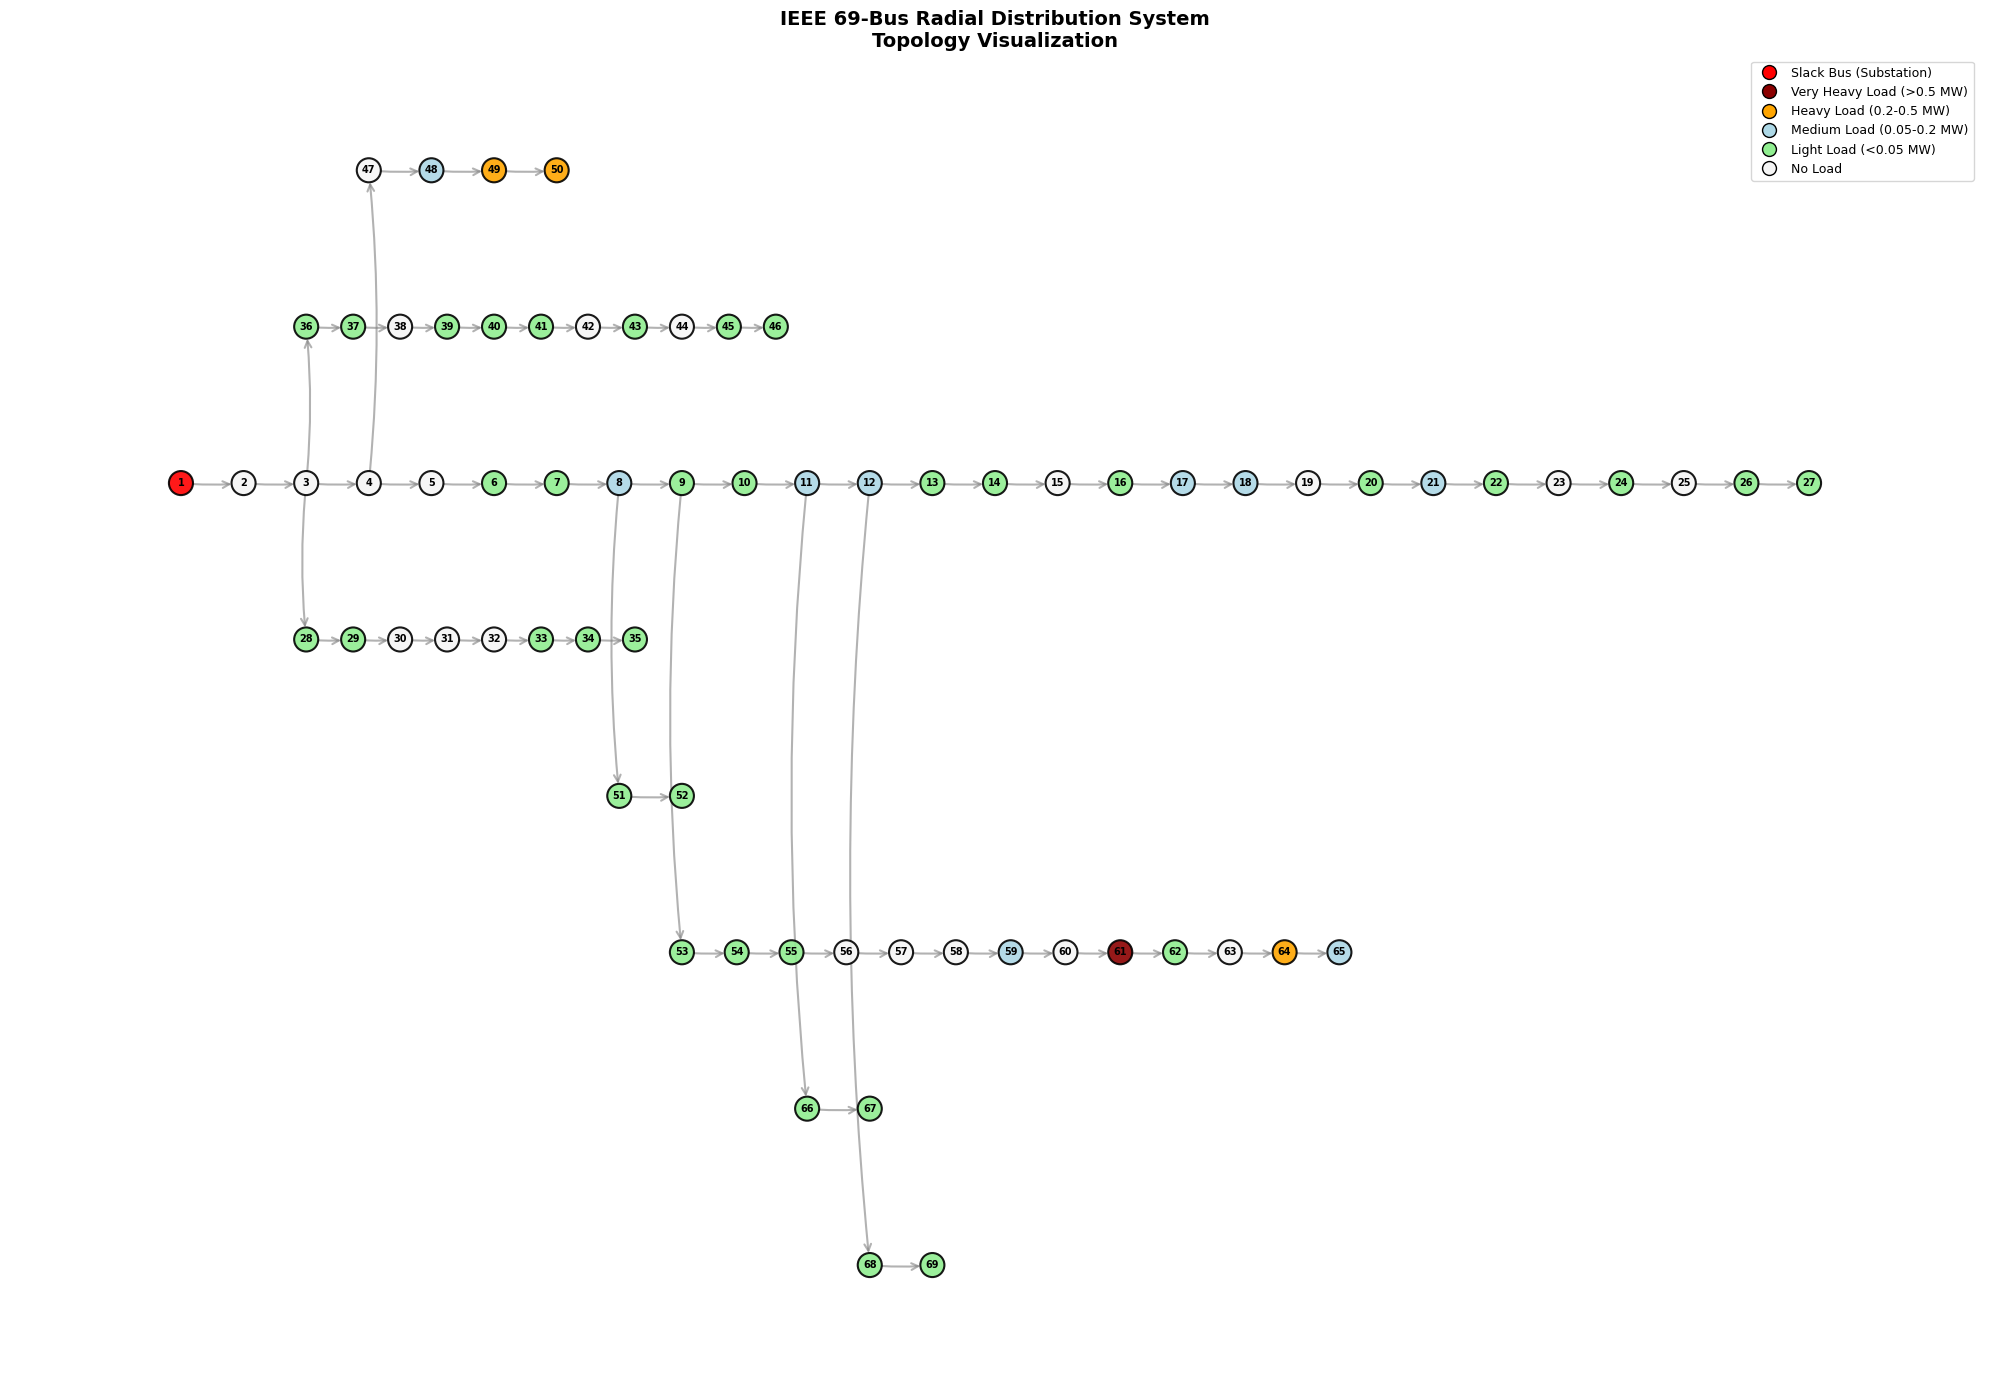

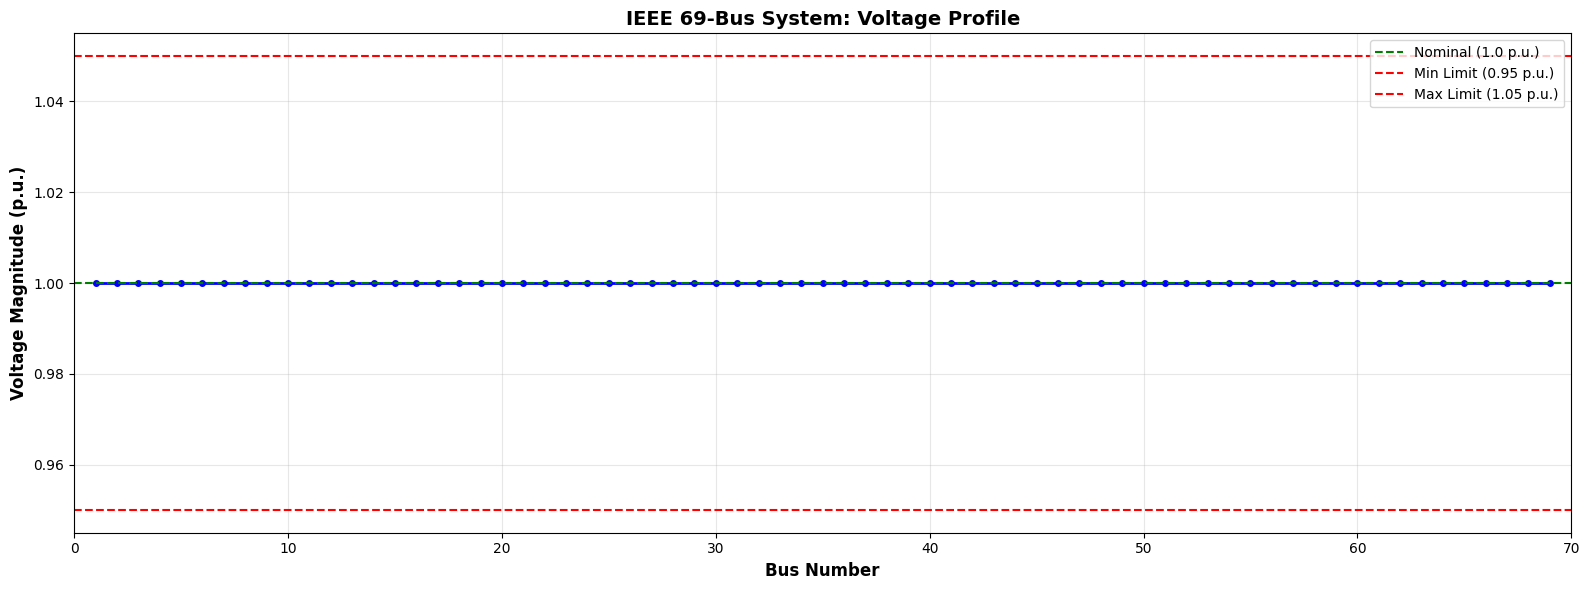

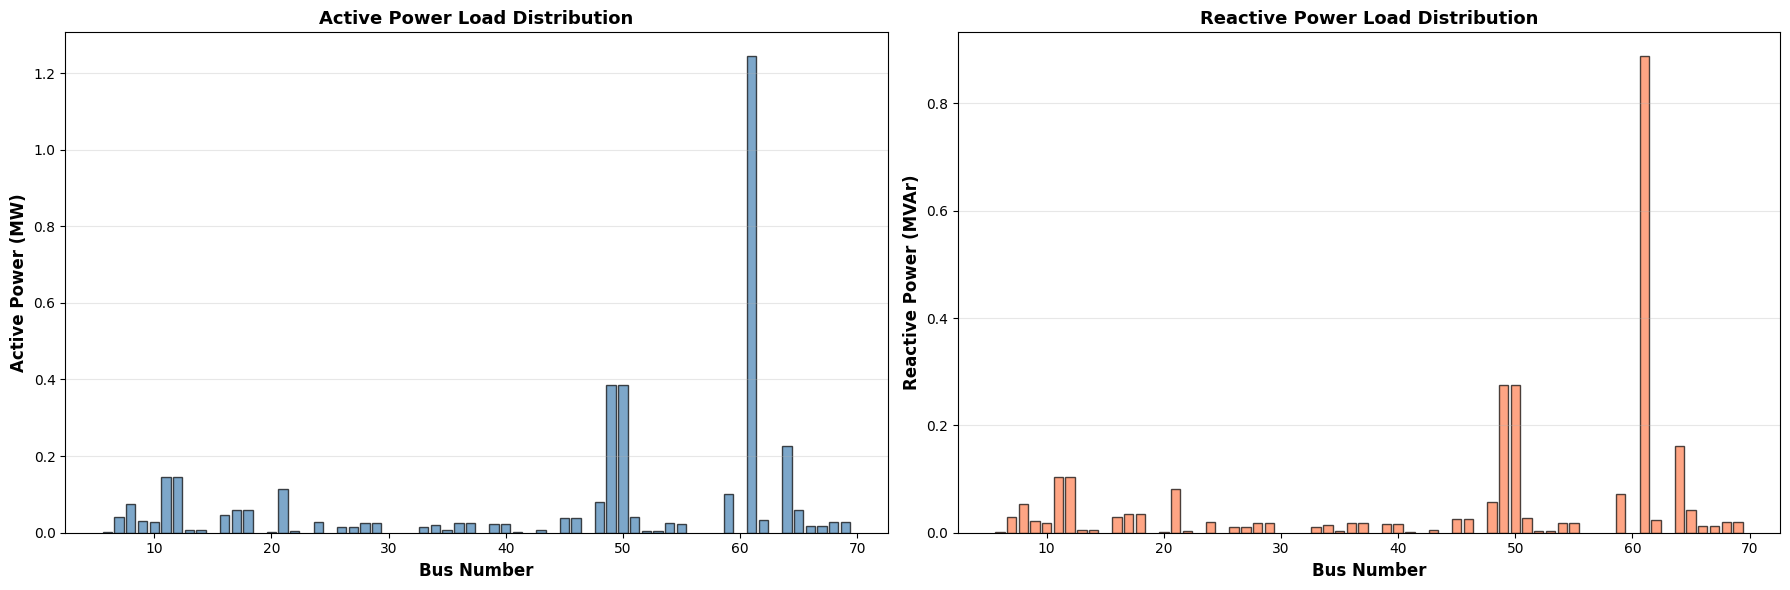

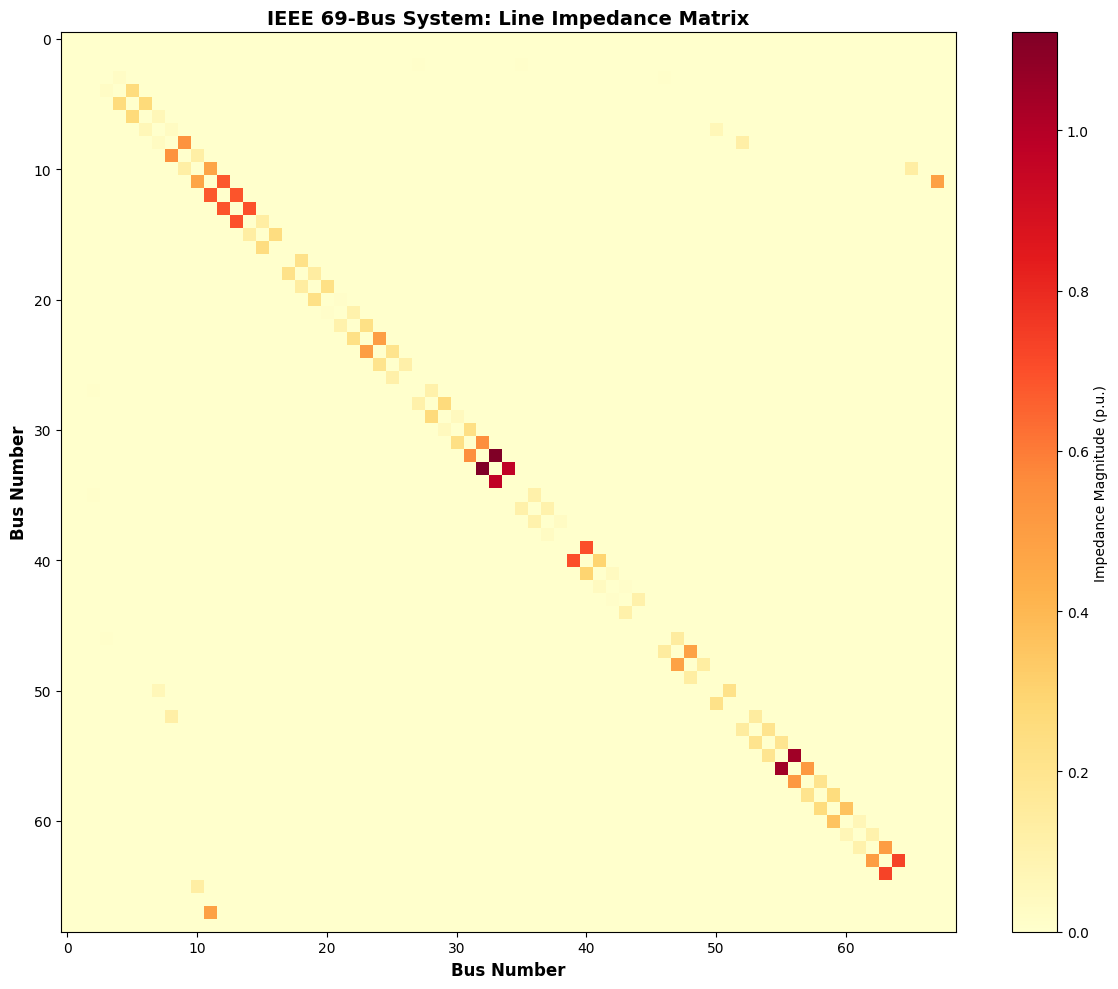

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass
from typing import List

@dataclass
class Bus:
    """
    Represents a bus in the power system
    
    Attributes:
        number: Bus identification number
        bus_type: 1=Slack/Swing, 2=PV/Generator, 3=PQ/Load
        voltage: Voltage magnitude in per unit (p.u.)
        angle: Voltage angle in radians
        p_load: Active power load in MW
        q_load: Reactive power load in MVAr
    """
    number: int
    bus_type: int
    voltage: float = 1.0
    angle: float = 0.0
    p_load: float = 0.0
    q_load: float = 0.0

@dataclass
class Branch:
    """
    Represents a branch (transmission line) in the power system
    
    Attributes:
        from_bus: Starting bus number
        to_bus: Ending bus number
        resistance: Line resistance in per unit (p.u.)
        reactance: Line reactance in per unit (p.u.)
        susceptance: Line charging susceptance in p.u.
    """
    from_bus: int
    to_bus: int
    resistance: float
    reactance: float
    susceptance: float = 0.0

class IEEE69BusSystem:
    """
    IEEE 69-Bus Radial Distribution System
    
    This is a standard test system used for distribution network studies.
    Base Values:
        - Base MVA: 100 MVA
        - Base Voltage: 12.66 kV
        - Total Load: 3.802 MW + j2.694 MVAr
    """
    
    def __init__(self):
        self.name = "IEEE 69-Bus Radial Distribution System"
        self.base_mva = 100.0  # Base power in MVA
        self.base_kv = 12.66   # Base voltage in kV
        self.buses: List[Bus] = []
        self.branches: List[Branch] = []
        self._build_system()
    
    def _build_system(self):
        """Construct the complete IEEE 69-bus system"""
        self._create_buses()
        self._create_branches()
    
    def _create_buses(self):
        """
        Create all 69 buses with their load data
        
        Load data format: [Bus Number, P_load (kW), Q_load (kVAr)]
        Bus 1 is the slack bus (substation) with no load
        """
        # Bus load data from IEEE 69-bus standard test system
        bus_loads = [
            [1, 0, 0],          # Slack bus (substation)
            [2, 0, 0],
            [3, 0, 0],
            [4, 0, 0],
            [5, 0, 0],
            [6, 2.6, 2.2],
            [7, 40.4, 30],
            [8, 75, 54],
            [9, 30, 22],
            [10, 28, 19],
            [11, 145, 104],
            [12, 145, 104],
            [13, 8, 5],
            [14, 8, 5.5],
            [15, 0, 0],
            [16, 45.5, 30],
            [17, 60, 35],
            [18, 60, 35],
            [19, 0, 0],
            [20, 1, 0.6],
            [21, 114, 81],
            [22, 5, 3.5],
            [23, 0, 0],
            [24, 28, 20],
            [25, 0, 0],
            [26, 14, 10],
            [27, 14, 10],
            [28, 26, 18.6],
            [29, 26, 18.6],
            [30, 0, 0],
            [31, 0, 0],
            [32, 0, 0],
            [33, 14, 10],
            [34, 19.5, 14],
            [35, 6, 4],
            [36, 26, 18.55],
            [37, 26, 18.55],
            [38, 0, 0],
            [39, 24, 17],
            [40, 24, 17],
            [41, 1.2, 1],
            [42, 0, 0],
            [43, 6, 4.3],
            [44, 0, 0],
            [45, 39.22, 26.3],
            [46, 39.22, 26.3],
            [47, 0, 0],
            [48, 79, 56.4],
            [49, 384.7, 274.5],
            [50, 384.7, 274.5],
            [51, 40.5, 28.3],
            [52, 3.6, 2.7],
            [53, 4.35, 3.5],
            [54, 26.4, 19],
            [55, 24, 17.2],
            [56, 0, 0],
            [57, 0, 0],
            [58, 0, 0],
            [59, 100, 72],
            [60, 0, 0],
            [61, 1244, 888],
            [62, 32, 23],
            [63, 0, 0],
            [64, 227, 162],
            [65, 59, 42],
            [66, 18, 13],
            [67, 18, 13],
            [68, 28, 20],
            [69, 28, 20]
        ]
        
        # Create bus objects
        for bus_num, p_kw, q_kvar in bus_loads:
            bus_type = 1 if bus_num == 1 else 3  # 1=Slack, 3=PQ
            self.buses.append(Bus(
                number=bus_num,
                bus_type=bus_type,
                voltage=1.0,  # Initial voltage estimate
                angle=0.0,    # Initial angle estimate
                p_load=p_kw / 1000.0,    # Convert kW to MW
                q_load=q_kvar / 1000.0   # Convert kVAr to MVAr
            ))
    
    def _create_branches(self):
        """
        Create all branches (lines) with their impedance data
        
        Branch data format: [From Bus, To Bus, R (Ω), X (Ω)]
        Impedances are converted to per unit using base values
        """
        # Calculate base impedance: Z_base = (V_base)^2 / S_base
        base_z = (self.base_kv ** 2) / self.base_mva  # in Ohms
        
        # Line data from IEEE 69-bus standard test system
        line_data = [
            [1, 2, 0.0005, 0.0012],
            [2, 3, 0.0005, 0.0012],
            [3, 4, 0.0015, 0.0036],
            [4, 5, 0.0251, 0.0294],
            [5, 6, 0.366, 0.1864],
            [6, 7, 0.3811, 0.1941],
            [7, 8, 0.0922, 0.047],
            [8, 9, 0.0493, 0.0251],
            [9, 10, 0.819, 0.2707],
            [10, 11, 0.1872, 0.0619],
            [11, 12, 0.7114, 0.2351],
            [12, 13, 1.03, 0.34],
            [13, 14, 1.044, 0.345],
            [14, 15, 1.058, 0.3496],
            [15, 16, 0.1966, 0.065],
            [16, 17, 0.3744, 0.1238],
            [17, 18, 0.0047, 0.0016],
            [18, 19, 0.3276, 0.1083],
            [19, 20, 0.2106, 0.069],
            [20, 21, 0.3416, 0.1129],
            [21, 22, 0.014, 0.0046],
            [22, 23, 0.1591, 0.0526],
            [23, 24, 0.3463, 0.1145],
            [24, 25, 0.7488, 0.2475],
            [25, 26, 0.3089, 0.1021],
            [26, 27, 0.1732, 0.0572],
            [3, 28, 0.0044, 0.0108],
            [28, 29, 0.064, 0.1565],
            [29, 30, 0.3978, 0.1315],
            [30, 31, 0.0702, 0.0232],
            [31, 32, 0.351, 0.116],
            [32, 33, 0.839, 0.2816],
            [33, 34, 1.708, 0.5646],
            [34, 35, 1.474, 0.4873],
            [3, 36, 0.0044, 0.0108],
            [36, 37, 0.064, 0.1565],
            [37, 38, 0.1053, 0.123],
            [38, 39, 0.0304, 0.0355],
            [39, 40, 0.0018, 0.0021],
            [40, 41, 0.7283, 0.8509],
            [41, 42, 0.31, 0.3623],
            [42, 43, 0.041, 0.0478],
            [43, 44, 0.0092, 0.0116],
            [44, 45, 0.1089, 0.1373],
            [45, 46, 0.0009, 0.0012],
            [4, 47, 0.0034, 0.0084],
            [47, 48, 0.0851, 0.2083],
            [48, 49, 0.2898, 0.7091],
            [49, 50, 0.0822, 0.2011],
            [8, 51, 0.0928, 0.0473],
            [51, 52, 0.3319, 0.1114],
            [9, 53, 0.174, 0.0886],
            [53, 54, 0.203, 0.1034],
            [54, 55, 0.2842, 0.1447],
            [55, 56, 0.2813, 0.1433],
            [56, 57, 1.59, 0.5337],
            [57, 58, 0.7837, 0.263],
            [58, 59, 0.3042, 0.1006],
            [59, 60, 0.3861, 0.1172],
            [60, 61, 0.5075, 0.2585],
            [61, 62, 0.0974, 0.0496],
            [62, 63, 0.145, 0.0738],
            [63, 64, 0.7105, 0.3619],
            [64, 65, 1.041, 0.5302],
            [11, 66, 0.2012, 0.0611],
            [66, 67, 0.0047, 0.0014],
            [12, 68, 0.7394, 0.2444],
            [68, 69, 0.0047, 0.0016]
        ]
        
        # Create branch objects with per unit impedances
        for from_bus, to_bus, r_ohm, x_ohm in line_data:
            self.branches.append(Branch(
                from_bus=from_bus,
                to_bus=to_bus,
                resistance=r_ohm / base_z,  # Convert to p.u.
                reactance=x_ohm / base_z,   # Convert to p.u.
                susceptance=0.0  # Negligible for distribution systems
            ))
    
    def get_bus_data(self) -> pd.DataFrame:
        """
        Return bus data as a pandas DataFrame
        
        Returns:
            DataFrame with bus information including voltages and loads
        """
        bus_data = []
        for bus in self.buses:
            bus_data.append({
                'Bus': bus.number,
                'Type': 'Slack' if bus.bus_type == 1 else 'PQ',
                'V (p.u.)': f"{bus.voltage:.4f}",
                'Angle (deg)': f"{np.degrees(bus.angle):.2f}",
                'P_Load (MW)': f"{bus.p_load:.4f}",
                'Q_Load (MVAr)': f"{bus.q_load:.4f}"
            })
        return pd.DataFrame(bus_data)
    
    def get_branch_data(self) -> pd.DataFrame:
        """
        Return branch data as a pandas DataFrame
        
        Returns:
            DataFrame with line information including impedances
        """
        branch_data = []
        for branch in self.branches:
            branch_data.append({
                'From Bus': branch.from_bus,
                'To Bus': branch.to_bus,
                'R (p.u.)': f"{branch.resistance:.6f}",
                'X (p.u.)': f"{branch.reactance:.6f}",
                'Z (p.u.)': f"{np.sqrt(branch.resistance**2 + branch.reactance**2):.6f}"
            })
        return pd.DataFrame(branch_data)
    
    def get_ybus_matrix(self) -> np.ndarray:
        """
        Calculate the bus admittance matrix (Y-bus)
        
        The Y-bus matrix is fundamental for power flow analysis
        Y[i,j] represents the admittance between bus i and bus j
        
        Returns:
            Complex numpy array representing the Y-bus matrix
        """
        n_buses = len(self.buses)
        Y = np.zeros((n_buses, n_buses), dtype=complex)
        
        # Build Y-bus from branch data
        for branch in self.branches:
            i = branch.from_bus - 1  # Convert to 0-based indexing
            j = branch.to_bus - 1
            
            # Calculate branch admittance
            z = branch.resistance + 1j * branch.reactance
            y = 1.0 / z if abs(z) > 1e-10 else 0.0
            
            # Fill Y-bus matrix
            # Off-diagonal elements (mutual admittance)
            Y[i, j] -= y
            Y[j, i] -= y
            
            # Diagonal elements (self admittance)
            Y[i, i] += y
            Y[j, j] += y
        
        return Y
    
    def print_system_info(self):
        """Print comprehensive system information"""
        print("="*70)
        print(f"{self.name}")
        print("="*70)
        print(f"Base MVA: {self.base_mva} MVA")
        print(f"Base Voltage: {self.base_kv} kV")
        print(f"Number of Buses: {len(self.buses)}")
        print(f"Number of Branches: {len(self.branches)}")
        
        # Calculate total load
        total_p = sum(bus.p_load for bus in self.buses)
        total_q = sum(bus.q_load for bus in self.buses)
        print(f"Total Load: {total_p:.3f} MW + j{total_q:.3f} MVAr")
        print("="*70)
    
    def plot_topology(self, figsize=(20, 14), show_bus_labels=True, 
                      show_loads=False, node_size=300):
        """
        Visualize the system topology using NetworkX
        
        Args:
            figsize: Figure size (width, height)
            show_bus_labels: Whether to show bus numbers
            show_loads: Whether to display load values on buses
            node_size: Size of bus nodes
        """
        # Create directed graph
        G = nx.DiGraph()
        
        # Add nodes (buses)
        for bus in self.buses:
            G.add_node(bus.number)
        
        # Add edges (branches)
        for branch in self.branches:
            G.add_edge(branch.from_bus, branch.to_bus)
        
        # Create figure
        plt.figure(figsize=figsize)
        
        # Use custom hierarchical layout for radial system
        pos = self._custom_hierarchical_layout()
        
        # Color nodes based on type and load
        node_colors = []
        for bus in self.buses:
            if bus.bus_type == 1:  # Slack bus
                node_colors.append('red')
            elif bus.p_load > 0.5:  # Very heavy load
                node_colors.append('darkred')
            elif bus.p_load > 0.2:  # Heavy load
                node_colors.append('orange')
            elif bus.p_load > 0.05:  # Medium load
                node_colors.append('lightblue')
            elif bus.p_load > 0:  # Light load
                node_colors.append('lightgreen')
            else:  # No load
                node_colors.append('whitesmoke')
        
        # Draw network
        nx.draw_networkx_nodes(G, pos, node_color=node_colors, 
                              node_size=node_size, alpha=0.9, 
                              edgecolors='black', linewidths=1.5)
        
        nx.draw_networkx_edges(G, pos, edge_color='gray', 
                              width=1.5, alpha=0.6, 
                              arrows=True, arrowsize=12, 
                              arrowstyle='->', connectionstyle='arc3,rad=0.05')
        
        # Draw labels
        if show_bus_labels:
            if show_loads:
                # Show bus number and load
                labels = {}
                for bus in self.buses:
                    if bus.p_load > 0:
                        labels[bus.number] = f"{bus.number}\n{bus.p_load:.2f}MW"
                    else:
                        labels[bus.number] = f"{bus.number}"
                nx.draw_networkx_labels(G, pos, labels, font_size=6, 
                                       font_weight='bold')
            else:
                # Show only bus numbers
                nx.draw_networkx_labels(G, pos, 
                                       {bus.number: str(bus.number) 
                                        for bus in self.buses}, 
                                       font_size=7, font_weight='bold')
        
        # Add legend
        legend_elements = [
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='red', markersize=10, 
                      label='Slack Bus (Substation)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='darkred', markersize=10, 
                      label='Very Heavy Load (>0.5 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='orange', markersize=10, 
                      label='Heavy Load (0.2-0.5 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightblue', markersize=10, 
                      label='Medium Load (0.05-0.2 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='lightgreen', markersize=10, 
                      label='Light Load (<0.05 MW)', markeredgecolor='black'),
            plt.Line2D([0], [0], marker='o', color='w', 
                      markerfacecolor='whitesmoke', markersize=10, 
                      label='No Load', markeredgecolor='black')
        ]
        plt.legend(handles=legend_elements, loc='upper right', fontsize=9)
        
        plt.title(f"{self.name}\nTopology Visualization", 
                 fontsize=14, fontweight='bold')
        plt.axis('off')
        plt.tight_layout()
        plt.show()
    
    def plot_voltage_profile(self, voltages=None):
        """
        Plot voltage profile along the feeder
        
        Args:
            voltages: Array of bus voltages (if None, uses initial values)
        """
        if voltages is None:
            voltages = [bus.voltage for bus in self.buses]
        
        bus_numbers = [bus.number for bus in self.buses]
        
        plt.figure(figsize=(16, 6))
        plt.plot(bus_numbers, voltages, 'b-o', linewidth=2, markersize=4)
        plt.axhline(y=1.0, color='g', linestyle='--', label='Nominal (1.0 p.u.)')
        plt.axhline(y=0.95, color='r', linestyle='--', label='Min Limit (0.95 p.u.)')
        plt.axhline(y=1.05, color='r', linestyle='--', label='Max Limit (1.05 p.u.)')
        
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Voltage Magnitude (p.u.)', fontsize=12, fontweight='bold')
        plt.title('IEEE 69-Bus System: Voltage Profile', 
                 fontsize=14, fontweight='bold')
        plt.grid(True, alpha=0.3)
        plt.legend(fontsize=10)
        plt.xlim(0, 70)
        plt.tight_layout()
        plt.show()
    
    def plot_load_distribution(self):
        """Plot the load distribution across all buses"""
        bus_numbers = [bus.number for bus in self.buses if bus.p_load > 0]
        p_loads = [bus.p_load for bus in self.buses if bus.p_load > 0]
        q_loads = [bus.q_load for bus in self.buses if bus.p_load > 0]
        
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
        
        # Active power
        ax1.bar(bus_numbers, p_loads, color='steelblue', alpha=0.7, edgecolor='black')
        ax1.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax1.set_ylabel('Active Power (MW)', fontsize=12, fontweight='bold')
        ax1.set_title('Active Power Load Distribution', fontsize=13, fontweight='bold')
        ax1.grid(True, alpha=0.3, axis='y')
        
        # Reactive power
        ax2.bar(bus_numbers, q_loads, color='coral', alpha=0.7, edgecolor='black')
        ax2.set_xlabel('Bus Number', fontsize=12, fontweight='bold')
        ax2.set_ylabel('Reactive Power (MVAr)', fontsize=12, fontweight='bold')
        ax2.set_title('Reactive Power Load Distribution', fontsize=13, fontweight='bold')
        ax2.grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()
    
    def plot_impedance_heatmap(self):
        """Plot heatmap of line impedances"""
        n = len(self.buses)
        Z_matrix = np.zeros((n, n))
        
        for branch in self.branches:
            i = branch.from_bus - 1
            j = branch.to_bus - 1
            z_mag = np.sqrt(branch.resistance**2 + branch.reactance**2)
            Z_matrix[i, j] = z_mag
            Z_matrix[j, i] = z_mag
        
        plt.figure(figsize=(12, 10))
        plt.imshow(Z_matrix, cmap='YlOrRd', aspect='auto')
        plt.colorbar(label='Impedance Magnitude (p.u.)')
        plt.title('IEEE 69-Bus System: Line Impedance Matrix', 
                 fontsize=14, fontweight='bold')
        plt.xlabel('Bus Number', fontsize=12, fontweight='bold')
        plt.ylabel('Bus Number', fontsize=12, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def _custom_hierarchical_layout(self):
        """
        Create a custom hierarchical layout for the IEEE 69-bus system
        Arranges buses in a tree-like structure following the radial topology
        """
        pos = {}
        
        # Main feeder from bus 1 to 27
        # Bus 1-27 form the main horizontal backbone
        y_main = 10
        for i in range(1, 28):
            pos[i] = (i * 0.8, y_main)
        
        # Lateral 1: Bus 28-35 (branches from bus 3)
        y_lateral1 = 8
        for i, bus in enumerate([28, 29, 30, 31, 32, 33, 34, 35]):
            pos[bus] = (2.4 + i * 0.6, y_lateral1)
        
        # Lateral 2: Bus 36-46 (branches from bus 3)
        y_lateral2 = 12
        for i, bus in enumerate([36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]):
            pos[bus] = (2.4 + i * 0.6, y_lateral2)
        
        # Lateral 3: Bus 47-50 (branches from bus 4)
        y_lateral3 = 14
        for i, bus in enumerate([47, 48, 49, 50]):
            pos[bus] = (3.2 + i * 0.8, y_lateral3)
        
        # Lateral 4: Bus 51-52 (branches from bus 8)
        y_lateral4 = 6
        for i, bus in enumerate([51, 52]):
            pos[bus] = (6.4 + i * 0.8, y_lateral4)
        
        # Lateral 5: Bus 53-65 (branches from bus 9)
        y_lateral5 = 4
        for i, bus in enumerate([53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65]):
            pos[bus] = (7.2 + i * 0.7, y_lateral5)
        
        # Lateral 6: Bus 66-67 (branches from bus 11)
        y_lateral6 = 2
        for i, bus in enumerate([66, 67]):
            pos[bus] = (8.8 + i * 0.8, y_lateral6)
        
        # Lateral 7: Bus 68-69 (branches from bus 12)
        y_lateral7 = 0
        for i, bus in enumerate([68, 69]):
            pos[bus] = (9.6 + i * 0.8, y_lateral7)
        
        return pos


# Example usage
if __name__ == "__main__":
    # Create the IEEE 69-bus system
    system = IEEE69BusSystem()
    
    # Print system information
    system.print_system_info()
    
    print("\n" + "="*70)
    print("BUS DATA (First 15 buses)")
    print("="*70)
    print(system.get_bus_data().head(15).to_string(index=False))
    
    print("\n" + "="*70)
    print("BRANCH DATA (First 15 branches)")
    print("="*70)
    print(system.get_branch_data().head(15).to_string(index=False))
    
    print("\n" + "="*70)
    print("Y-BUS MATRIX (Magnitude - First 5x5)")
    print("="*70)
    Y = system.get_ybus_matrix()
    print(np.abs(Y[:5, :5]))
    
    # Visualizations
    print("\n" + "="*70)
    print("GENERATING VISUALIZATIONS...")
    print("="*70)
    
    # 1. System topology
    system.plot_topology(show_bus_labels=True, show_loads=False)
    
    # 2. Voltage profile (initial/flat start)
    system.plot_voltage_profile()
    
    # 3. Load distribution
    system.plot_load_distribution()
    
    # 4. Impedance heatmap
    system.plot_impedance_heatmap()

IEEE 118 BUS SYSTEME